# Pengenalan DRMS

DRMS merupakan modul dalam python yang digunakan untuk mengolah data SDO seperti HMI dan AIA. 

In [2]:
import drms
import matplotlib.pyplot as plt
from matplotlib import dates
%matplotlib notebook

In [3]:
client = drms.Client()
print(client)

<Client "JSOC">


In [4]:
client.series('45s')

[u'hmi.Ic_45s',
 u'hmi.Lw_45s',
 u'hmi.M_45s',
 u'hmi.V_45s',
 u'hmi.ld_45s',
 u'hmi.vw_v_45s']

In [6]:
client.series('hmi\.sharp_')

[u'hmi.sharp_720s',
 u'hmi.sharp_720s_nrt',
 u'hmi.sharp_cea_720s',
 u'hmi.sharp_cea_720s_nrt']

## Memperoleh informasi data

In [7]:
info_dopp = client.info('hmi.sharp_cea_720s')

In [8]:
print(info_dopp)

<SeriesInfo "hmi.sharp_cea_720s">


In [10]:
info_dopp.primekeys

[u'HARPNUM', u'T_REC']

In [13]:
info_dopp.keywords.index

Index([u'cparms_sg000', u'magnetogram_bzero', u'magnetogram_bscale',
       u'cparms_sg001', u'bitmap_bzero', u'bitmap_bscale', u'cparms_sg002',
       u'Dopplergram_bzero', u'Dopplergram_bscale', u'cparms_sg003',
       ...
       u'CMASK', u'ERRJZ', u'ERRVF', u'ERRALP', u'ERRMIH', u'ERRMSHA',
       u'ERRUSI', u'DOFFSET', u'ERRTPOT', u'ERRJHT'],
      dtype='object', name=u'name', length=211)

In [43]:
info_dopp.keywords.loc[['T_REC','DSUN_OBS','OBS_VR','TOTUSJH','TOTPOT','TOTUSJZ','USFLUX']]

,type,recscope,defval,units,note,linkinfo,is_time,is_integer,is_real,is_numeric
name,,,,,,,,,,
T_REC,time,ts_eq,-4712.01.01_11:59:28_TAI,TAI,Slot time,None,True,False,False,False
DSUN_OBS,double,variable,nan,meters,Distance from SDO to Sun center.,None,False,False,True,True
OBS_VR,double,variable,nan,m/s,velocity of the observer in radial direction. ...,None,False,False,True,True
TOTUSJH,float,variable,nan,(G^2)/m,Total unsigned current helicity,None,False,False,True,True
TOTPOT,float,variable,nan,Ergs per cubic centimeter,Total photospheric magnetic energy density,None,False,False,True,True
TOTUSJZ,float,variable,nan,Amperes,Total unsigned vertical current,None,False,False,True,True
USFLUX,float,variable,nan,Maxwell,Total unsigned flux,None,False,False,True,True


In [19]:
info_dopp.segments

,type,units,protocol,dims,note
name,,,,,
magnetogram,int,Gauss,fits,VARxVAR,Line-of-sight magnetogram in CEA projection
bitmap,char,Enumerated,fits,VARxVAR,Mask for the patch in CEA coordinates
Dopplergram,int,m/s,fits,VARxVAR,Dopplergram in CEA projection
continuum,int,DN/s,fits,VARxVAR,Intensitygram in CEA projection
Bp,int,Gauss,fits,VARxVAR,"B_phi, positive westward"
Bt,int,Gauss,fits,VARxVAR,"B_theta, positive southward"
Br,int,Gauss,fits,VARxVAR,"B_r, positive up"
Bp_err,int,Gauss,fits,VARxVAR,Standard deviation of B_phi
Bt_err,int,Gauss,fits,VARxVAR,Standard deviation of B_theta


## Membuat antrian metadata

Perintah utama untuk membuat antrian dalam DRMS adalah fungsi drms.Client.query(). Fungsi tersebut dapat digunakan untuk memanggil metadata serta lokasi segment datanya. 

In [41]:
k = client.query('hmi.sharp_cea_720s[5298][2015.03.11_15:00/3h]',key=['T_REC','T_OBS','DSUN_OBS','TOTUSJH','TOTPOT','TOTUSJZ','USFLUX'])

Tanda [] membolehkan ada ',' di dalam perintah key.

In [42]:
k

,T_REC,T_OBS,DSUN_OBS,TOTUSJH,TOTPOT,TOTUSJZ,USFLUX
0,2015.03.11_15:00:00_TAI,2015.03.11_14:59:57_TAI,1.485829e+11,3409.659,7.978746e+23,5.630999e+13,2.499142e+22
1,2015.03.11_15:12:00_TAI,2015.03.11_15:11:57_TAI,1.485814e+11,3437.387,8.064112e+23,5.721081e+13,2.519682e+22
2,2015.03.11_15:24:00_TAI,2015.03.11_15:23:57_TAI,1.485799e+11,3452.678,8.067649e+23,5.734651e+13,2.531061e+22
3,2015.03.11_15:36:00_TAI,2015.03.11_15:35:57_TAI,1.485785e+11,3499.904,8.155394e+23,5.881701e+13,2.549591e+22
4,2015.03.11_15:48:00_TAI,2015.03.11_15:47:57_TAI,1.485772e+11,3435.084,8.152260e+23,5.786026e+13,2.547195e+22
5,2015.03.11_16:00:00_TAI,2015.03.11_15:59:57_TAI,1.485759e+11,3425.464,8.168400e+23,5.783276e+13,2.562309e+22
6,2015.03.11_16:12:00_TAI,2015.03.11_16:11:57_TAI,1.485747e+11,3411.100,8.131612e+23,5.748836e+13,2.551168e+22
7,2015.03.11_16:24:00_TAI,2015.03.11_16:23:57_TAI,1.485736e+11,3413.623,8.305092e+23,5.725492e+13,2.504589e+22
8,2015.03.11_16:36:00_TAI,2015.03.11_16:35:57_TAI,1.485726e+11,3469.833,8.335478e+23,5.583381e+13,2.514794e+22
9,2015.03.11_16:48:00_TAI,2015.03.11_16:47:57_TAI,1.485717e+11,3487.761,8.327411e+23,5.521854e+13,2.504759e+22


Ubah waktu dari format TAI ke format standar supaya bisa melakukan pengolahan lebih lanjut.

In [37]:
t_rec = drms.to_datetime(k['T_REC'])

In [38]:
t_rec

0    2015-03-11 15:00:00
1    2015-03-11 15:12:00
2    2015-03-11 15:24:00
3    2015-03-11 15:36:00
4    2015-03-11 15:48:00
5    2015-03-11 16:00:00
6    2015-03-11 16:12:00
7    2015-03-11 16:24:00
8    2015-03-11 16:36:00
9    2015-03-11 16:48:00
10   2015-03-11 17:00:00
11   2015-03-11 17:12:00
12   2015-03-11 17:24:00
13   2015-03-11 17:36:00
14   2015-03-11 17:48:00
Name: T_REC, dtype: datetime64[ns]

<IPython.core.display.Javascript object>


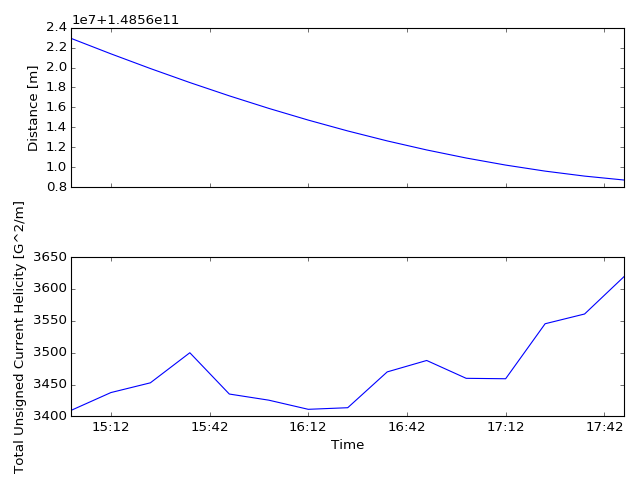

In [45]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

ax[0].plot(t_rec, k['DSUN_OBS'])
ax[0].set_ylabel('Distance [m]')

ax[1].plot(t_rec, k['TOTUSJH'])
ax[1].set_ylabel('Total Unsigned Current Helicity [G^2/m]')

ax[1].set_xlabel('Time')
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
fig.tight_layout()
fig.show()

### contoh untuk data HMI m

In [46]:
keys = client.query('hmi.m_720s[2017.01.01_TAI/1d]', key=['T_REC', 'OBS_VR', 'DSUN_OBS'])

In [47]:
t_rec = drms.to_datetime(keys['T_REC'])

<IPython.core.display.Javascript object>


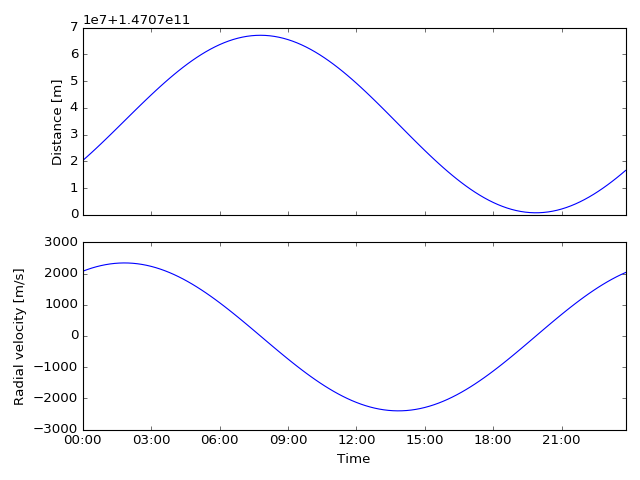

In [48]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

ax[0].plot(t_rec, keys['DSUN_OBS'])
ax[0].set_ylabel('Distance [m]')

ax[1].plot(t_rec, keys['OBS_VR'])
ax[1].set_ylabel('Radial velocity [m/s]')

ax[1].set_xlabel('Time')
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
fig.tight_layout()
fig.show()

In [49]:
keys = client.query('hmi.m_720s[2015.01.01_TAI/365d@3h]', key=['T_REC', 'DSUN_OBS'])
t_rec = drms.to_datetime(keys['T_REC'])

<IPython.core.display.Javascript object>


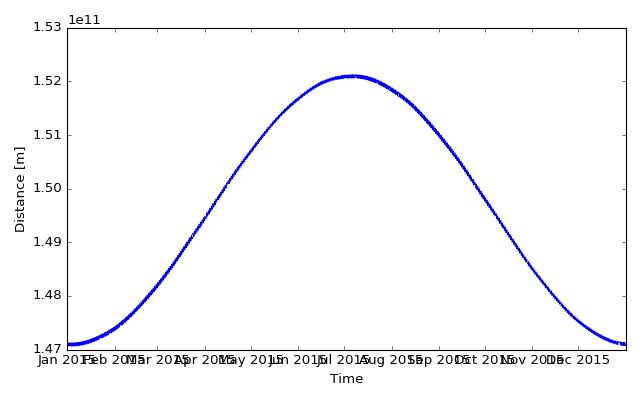

In [50]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(t_rec, keys['DSUN_OBS'])
ax.set_xlabel('Time')
ax.set_ylabel('Distance [m]')
fig.tight_layout()
fig.show()